BT Career Challenge

1. Check the data, adjust data, delete null value

1.1 Import needed libraries and data

In [85]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import imblearn

# functions for modelling
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ROC curve and AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [5]:
# use pandas import data
df_customer = pd.read_csv('./Data/Data Set.csv')
df_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,29.85,29.85,No
1,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthtomonth,Yes,Mailed check,53.85,108.15,Yes
2,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,70.70,151.65,Yes
3,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Monthtomonth,Yes,Electronic check,99.65,820.5,Yes
4,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Monthtomonth,Yes,Credit card (automatic),89.10,1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7039,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7040,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7041,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


In [6]:
# check the datatype and the number of records
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# check the number of churn
df_customer.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From the inital exploration, we can see we have 21 columns covering customers' features, and the most important feature churn has 1869 customers who left BT services (indicating it is an imbalanced dataset). It is time to validate data including:
- delete unuseful columns, like customerID
- delete null values
- check if customers is unique
- convert some features from string to numeric values
- merge some categories in features

1.2 Sort out data

To process logistic regression, the values in columns should be transformed:
- Change data type
- Merge categories
- Generate dummy variable for categorical variables (One hot encoding)

In [8]:
# drop customerID
df_customer.drop('customerID', axis = 'columns', inplace = True)
df_customer.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4555,Female,1,Yes,Yes,66,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),110.60,7210.85,No
2488,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check,70.35,70.35,No
1445,Male,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Monthtomonth,Yes,Electronic check,84.80,84.8,Yes
2931,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Monthtomonth,Yes,Electronic check,95.20,292.85,Yes
5920,Female,0,No,Yes,49,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.45,1024.65,No


In [9]:
# convert TotalCharges from categorical values to numerical values
df_customer['TotalCharges'] = pd.to_numeric(df_customer.TotalCharges, errors='coerce')

In [10]:
# check the unique values of each feature
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

print_unique_col_values(df_customer)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Monthtomonth' 'Two year' 'One year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Churn: ['No' 'Yes']


In [11]:
# replace No internet service to No, replace No phone service to No
df_customer.replace('No phone service', 'No', inplace = True)
df_customer.replace('No internet service', 'No', inplace = True)
df_customer.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5831,Female,0,Yes,Yes,35,No,No,DSL,Yes,No,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),46.35,1662.05,No
2136,Male,0,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Monthtomonth,Yes,Electronic check,114.10,7132.15,No
6549,Female,0,No,No,41,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Mailed check,19.85,810.45,No
2534,Male,0,No,No,6,Yes,No,No,No,No,No,No,No,No,Monthtomonth,No,Bank transfer (automatic),20.15,130.50,No
693,Female,0,No,No,15,Yes,No,No,No,No,No,No,No,No,Monthtomonth,No,Bank transfer (automatic),19.40,289.30,Yes


In [12]:
# convert yes to 1, no to 0 for analysis; male to 1, female to 0 for analysis
mapping_dict = {'Male': 0, 'Female': 1, 'No': 0, 'Yes': 1}

cols_to_replace = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

df_customer[cols_to_replace] = df_customer[cols_to_replace].replace(mapping_dict)
df_customer.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4790,0,0,1,1,69,1,0,No,0,0,0,0,0,0,One year,1,Credit card (automatic),20.55,1403.10,0
2755,0,1,0,0,50,1,1,Fiber optic,0,0,0,0,1,1,Monthtomonth,1,Electronic check,95.70,4816.70,1
3726,0,0,0,1,29,0,0,DSL,1,1,1,1,0,0,Monthtomonth,1,Mailed check,45.00,1242.45,0
3810,0,0,0,0,54,1,1,Fiber optic,0,1,0,0,0,0,Monthtomonth,1,Bank transfer (automatic),79.85,4308.25,0
6103,0,0,0,0,17,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),19.45,369.05,0


In [13]:
# generate dummy variables for categorical variables
df_customer_clean = pd.get_dummies(df_customer,columns=['InternetService','Contract','PaymentMethod'])
df_customer_clean.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthtomonth,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3993,1,0,0,0,65,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3332,0,1,1,0,53,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6650,1,0,0,1,61,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
5856,0,0,1,1,30,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
505,1,1,0,0,3,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [14]:
# scaling data to avoid bias
column_to_scale = ['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_customer_clean[column_to_scale] = scaler.fit_transform(df_customer_clean[column_to_scale])

In [15]:
# delete records with missing values
df_customer_clean.dropna(axis=0, inplace=True)
df_customer_clean.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthtomonth,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1546,1,0,0,0,0.055556,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
2284,0,0,1,1,0.083333,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4594,0,0,0,1,0.736111,1,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
3371,1,0,1,0,0.347222,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4355,0,0,1,0,0.930556,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


In [16]:
df_customer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

2. Modelling

After preparing data, there are several steps to build model:
- Split data into training dataset and test dataset

2.1 Split data

In [57]:
# keep columns except churn, copy it to avoid modifying the original one, set datatype as float
X = df_customer_clean.drop(columns = ['Churn']).copy().astype(float)


y = np.ravel(df_customer_clean[['Churn']])

In [58]:
X.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthtomonth,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2144,0.0,0.0,1.0,1.0,0.125000,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2861,0.0,0.0,0.0,0.0,0.069444,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5523,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4537,1.0,0.0,1.0,0.0,0.236111,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
48,0.0,0.0,0.0,0.0,0.125000,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
pd.Series(y).value_counts()

0    5163
1    1869
dtype: int64

In [61]:
# split training and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=6, stratify = y)

In [63]:
pd.Series(y_train).value_counts()

0    4130
1    1495
dtype: int64

In [64]:
pd.Series(y_test).value_counts()

0    1033
1     374
dtype: int64

In [65]:
X_train.shape

(5625, 26)

In [66]:
X_train.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthtomonth,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4887,1.0,0.0,0.0,0.0,0.750000,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4064,0.0,1.0,0.0,0.0,0.361111,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4383,0.0,0.0,1.0,1.0,0.388889,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
981,1.0,0.0,0.0,0.0,0.388889,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4648,1.0,0.0,1.0,1.0,0.708333,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


2.2 Logistic Regression

In [77]:
def log_reg(X_train, y_train, X_test, y_test, weights):
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print('Accuracy', acc, '\n')

    y_pred = model.predict(X_test)
    print('preds', y_pred[:5], '\n')

    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)

    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    print(y_pred_prob)

    # create dataframe of coeffiecents so they can be inspected

    df_summary = pd.DataFrame(model.coef_, columns = X_train.columns, index = ['Coeffs'])
    df_summary['intercept'] = model.intercept_
    return df_summary.transpose().sort_values(by='Coeffs',ascending = False), y_pred_prob


In [78]:
# set weights -1
weights = -1
summary, y_pred_prob = log_reg(X_train, y_train, X_test, y_test, weights)
summary

Accuracy 0.820184790334044 

preds [1 0 0 1 0] 

[[939  94]
 [159 215]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1033
           1       0.70      0.57      0.63       374

    accuracy                           0.82      1407
   macro avg       0.78      0.74      0.76      1407
weighted avg       0.81      0.82      0.81      1407

[0.7131892  0.20125403 0.01358995 ... 0.00295984 0.4321725  0.60941044]


,Coeffs
TotalCharges,1.450500
InternetService_Fiber optic,0.786220
Contract_Monthtomonth,0.717948
PaperlessBilling,0.353237
MultipleLines,0.273929
StreamingTV,0.239327
PaymentMethod_Electronic check,0.230604
SeniorCitizen,0.217162
StreamingMovies,0.184692
MonthlyCharges,0.130923


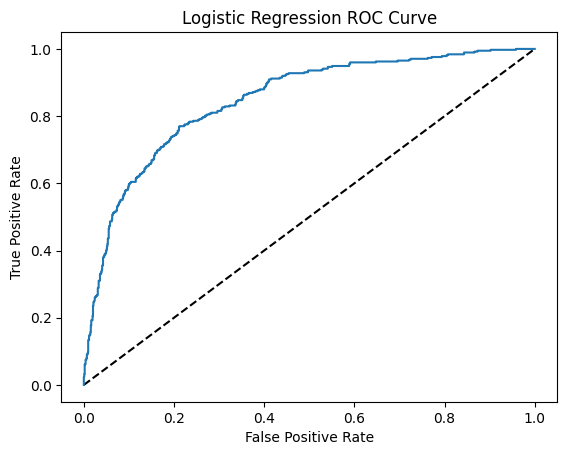

In [79]:
# plot the ROC curve for original model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [87]:
# larger area under the ROC curve = better model
AUC1 = roc_auc_score(y_test, y_pred_prob)
AUC1

0.8469167214540485

In [80]:
# optimse the model by oversampling
# keep columns except churn, copy it to avoid modifying the original one, set datatype as float
X = df_customer_clean.drop(columns = ['Churn']).copy().astype(float)


y = np.ravel(df_customer_clean[['Churn']]).astype(float)


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

pd.Series(y_sm).value_counts()


0.0    5163
1.0    5163
dtype: int64

In [81]:
# split training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = sklearn.model_selection.train_test_split(X_sm, y_sm, test_size=0.20, random_state=8, stratify = y_sm)

In [82]:
# number of classes in training data
pd.Series(y_train_sm).value_counts()

1.0    4130
0.0    4130
dtype: int64

In [83]:
# perform logistic regression
weights = -1
summary_opti, y_pred_prob_opti = log_reg(X_train_sm, y_train_sm, X_test_sm, y_test_sm, weights)

summary_opti

Accuracy 0.7744433688286544 

preds [0. 1. 0. 0. 0.] 

[[779 254]
 [212 821]]
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      1033
         1.0       0.76      0.79      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

[0.00400313 0.87524103 0.33117615 ... 0.87395033 0.01486623 0.8569802 ]


,Coeffs
TotalCharges,3.102785
InternetService_Fiber optic,0.801242
Contract_Monthtomonth,0.724111
PaperlessBilling,0.478273
intercept,0.325077
StreamingMovies,0.303341
PaymentMethod_Electronic check,0.237758
MultipleLines,0.223345
SeniorCitizen,0.154268
StreamingTV,0.099101


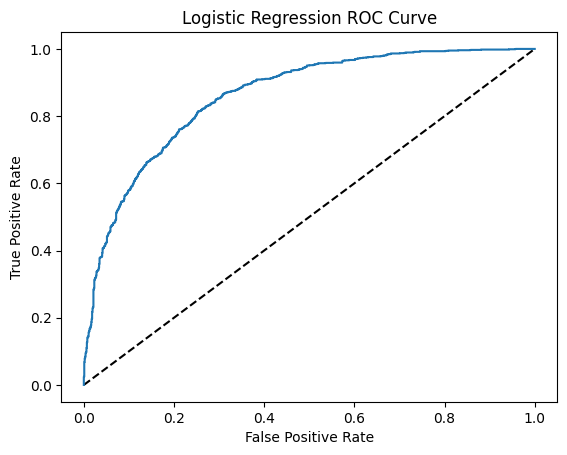

In [89]:
# plot the ROC curve for optimised model
fpr, tpr, thresholds = roc_curve(y_test_sm, y_pred_prob_opti)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression Version 2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [90]:
# larger area under the ROC curve = better model
AUC2 = roc_auc_score(y_test_sm, y_pred_prob_opti)
AUC2

0.8597291322467011

3. Insights

Feature Importance
    
    Importantly, understanding the actual meaning of model and taking some actions are the key of this project. The project is to understand why customer leave BT. 
    Firstly, let's see which feature cause customer 'churn'.

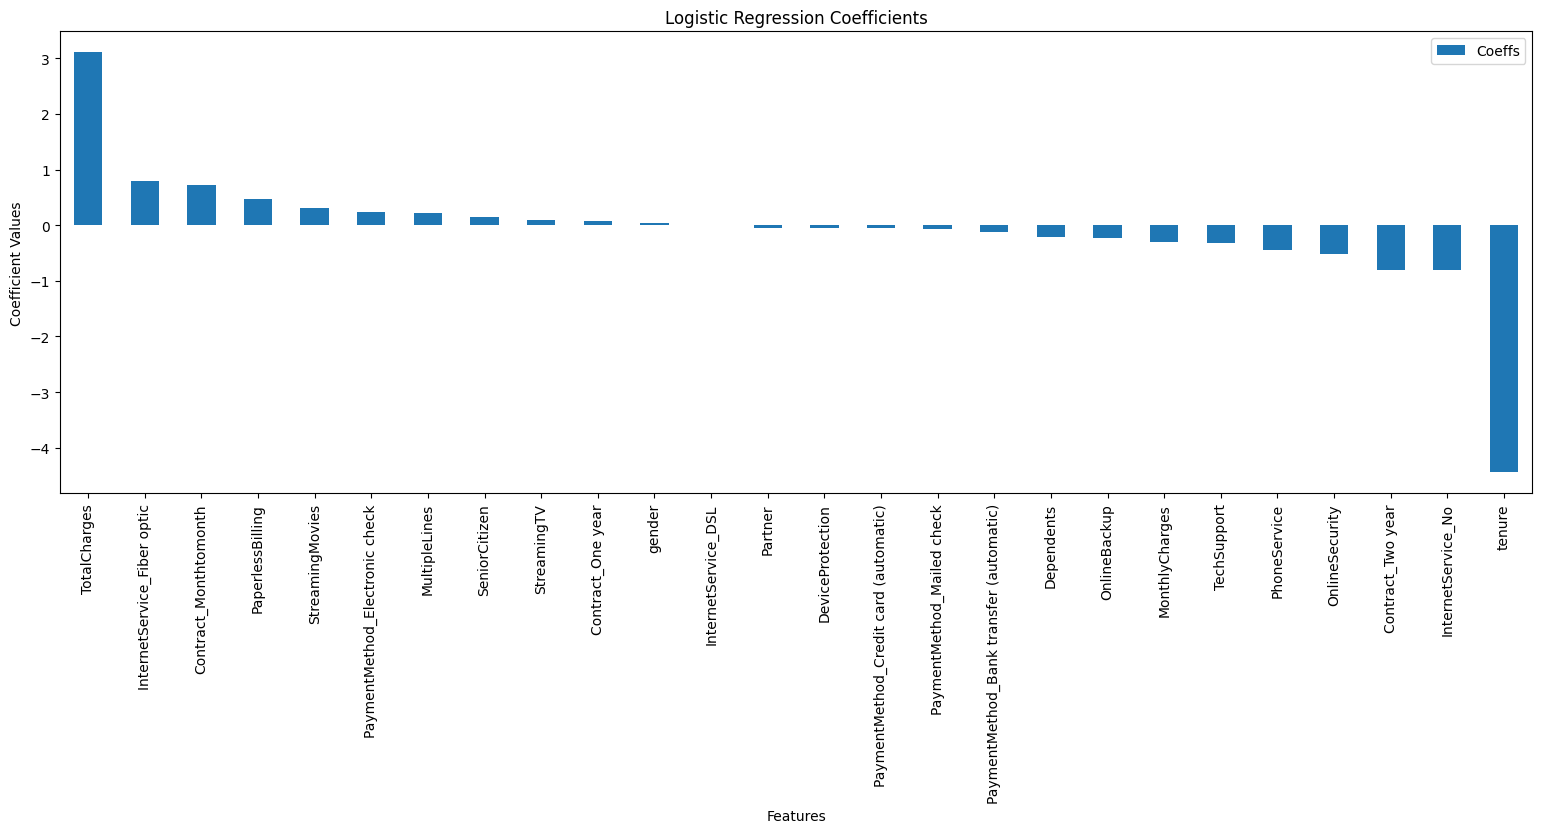

In [96]:
# sort dataframe by absolute value of coefficients
summary_sorted = summary_opti.drop('intercept', axis=0).sort_values(by='Coeffs', ascending=False)

# create bar plot 
summary_sorted.plot(kind='bar', figsize=(19, 6))

# set title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')

# show plot
plt.show()

